In [750]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc = {'figure.figsize':(15,8)})


## Questions
    Note: the system runs with Km not Miles.
      • For each purpose for each Category calculate the sum of kms driven
      • Describe the kms of all trips
      • Describe the speed of all trips
      • KMS been driven from Fort Pierce to Fort Pierce and how many trips
      • How many Trips in every start city and visualize the top 10
      • How many trips driven in all Months of year and visualize the top 4 month descening
      • How many trips driven in all days of week
      • How many KMS driven in all period of the day and visualiaze them descending
      • For each season for each category which has most driven count




In [751]:
df1=pd.read_csv('My Uber Drives - 2016.csv')

In [752]:
df=df1.copy()

In [753]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [754]:
## check duplicates

In [755]:
df.duplicated().sum()

1

In [756]:
df.drop_duplicates(inplace=True)

In [757]:
df.duplicated().sum()

0

In [758]:
## START WITH STEP 2 EDA process:
    #### univariate analysis

In [759]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1155 non-null   object 
 1   END_DATE*    1154 non-null   object 
 2   CATEGORY*    1154 non-null   object 
 3   START*       1154 non-null   object 
 4   STOP*        1154 non-null   object 
 5   MILES*       1155 non-null   float64
 6   PURPOSE*     652 non-null    object 
dtypes: float64(1), object(6)
memory usage: 72.2+ KB


In [760]:
## to take a look of all features
for features in df.columns:
    print(features,df[features].value_counts())
    print("**"*10)

START_DATE* 1/1/2016 21:11      1
10/28/2016 11:34    1
9/27/2016 19:14     1
9/27/2016 13:21     1
9/27/2016 8:33      1
                   ..
5/27/2016 20:47     1
5/27/2016 20:26     1
5/23/2016 21:09     1
5/23/2016 20:19     1
Totals              1
Name: START_DATE*, Length: 1155, dtype: int64
********************
END_DATE* 1/1/2016 21:17      1
10/27/2016 21:48    1
9/27/2016 14:43     1
9/27/2016 8:35      1
9/24/2016 20:33     1
                   ..
5/27/2016 20:53     1
5/27/2016 20:30     1
5/23/2016 21:21     1
5/23/2016 20:27     1
12/31/2016 23:51    1
Name: END_DATE*, Length: 1154, dtype: int64
********************
CATEGORY* Business    1077
Personal      77
Name: CATEGORY*, dtype: int64
********************
START* Cary             201
Granta           148
Morrisville       85
Whitebridge       68
Islamabad         57
                ... 
Florence           1
Ridgeland          1
Daytona Beach      1
Sky Lake           1
Gampaha            1
Name: START*, Length: 177, dt

In [761]:
df['START_DATE*'].value_counts()

1/1/2016 21:11      1
10/28/2016 11:34    1
9/27/2016 19:14     1
9/27/2016 13:21     1
9/27/2016 8:33      1
                   ..
5/27/2016 20:47     1
5/27/2016 20:26     1
5/23/2016 21:09     1
5/23/2016 20:19     1
Totals              1
Name: START_DATE*, Length: 1155, dtype: int64

In [762]:
df['END_DATE*'].value_counts()

1/1/2016 21:17      1
10/27/2016 21:48    1
9/27/2016 14:43     1
9/27/2016 8:35      1
9/24/2016 20:33     1
                   ..
5/27/2016 20:53     1
5/27/2016 20:30     1
5/23/2016 21:21     1
5/23/2016 20:27     1
12/31/2016 23:51    1
Name: END_DATE*, Length: 1154, dtype: int64

In [763]:
df['CATEGORY*'].value_counts()

Business    1077
Personal      77
Name: CATEGORY*, dtype: int64

In [764]:
df['CATEGORY*'].unique()

array(['Business', 'Personal', nan], dtype=object)

In [765]:
df['START*'].unique()

array(['Fort Pierce', 'West Palm Beach', 'Cary', 'Jamaica', 'New York',
       'Elmhurst', 'Midtown', 'East Harlem', 'Flatiron District',
       'Midtown East', 'Hudson Square', 'Lower Manhattan',
       "Hell's Kitchen", 'Downtown', 'Gulfton', 'Houston', 'Eagan Park',
       'Morrisville', 'Durham', 'Farmington Woods', 'Whitebridge',
       'Lake Wellingborough', 'Fayetteville Street', 'Raleigh',
       'Hazelwood', 'Fairmont', 'Meredith Townes', 'Apex', 'Chapel Hill',
       'Northwoods', 'Edgehill Farms', 'Tanglewood', 'Preston',
       'Eastgate', 'East Elmhurst', 'Jackson Heights', 'Long Island City',
       'Katunayaka', 'Granta', 'Colombo', 'Nugegoda', 'Islamabad',
       'R?walpindi', 'Noorpur Shahan', 'Heritage Pines', 'Westpark Place',
       'Waverly Place', 'Wayne Ridge', 'Weston', 'East Austin',
       'West University', 'South Congress', 'The Drag',
       'Congress Ave District', 'Red River District', 'Georgian Acres',
       'North Austin', 'Coxville', 'Convention Cente

In [766]:
df['STOP*'].unique()

array(['Fort Pierce', 'West Palm Beach', 'Palm Beach', 'Cary',
       'Morrisville', 'New York', 'Queens', 'East Harlem', 'NoMad',
       'Midtown', 'Midtown East', 'Hudson Square', 'Lower Manhattan',
       "Hell's Kitchen", 'Queens County', 'Gulfton', 'Downtown',
       'Houston', 'Jamestown Court', 'Durham', 'Whitebridge',
       'Lake Wellingborough', 'Raleigh', 'Umstead', 'Hazelwood',
       'Westpark Place', 'Meredith Townes', 'Leesville Hollow', 'Apex',
       'Chapel Hill', 'Williamsburg Manor', 'Macgregor Downs',
       'Edgehill Farms', 'Northwoods', 'Tanglewood', 'Preston',
       'Walnut Terrace', 'Jackson Heights', 'East Elmhurst',
       'Midtown West', 'Long Island City', 'Jamaica', 'Koamo', 'Colombo',
       'Nugegoda', 'Katunayaka', 'Islamabad', 'R?walpindi',
       'Noorpur Shahan', 'Heritage Pines', 'Waverly Place', 'Wayne Ridge',
       'Depot Historic District', 'Weston', 'West University',
       'South Congress', 'Arts District', 'Congress Ave District',
       '

In [767]:
df['MILES*'].unique()

array([5.10000e+00, 5.00000e+00, 4.80000e+00, 4.70000e+00, 6.37000e+01,
       4.30000e+00, 7.10000e+00, 8.00000e-01, 8.30000e+00, 1.65000e+01,
       1.08000e+01, 7.50000e+00, 6.20000e+00, 6.40000e+00, 1.60000e+00,
       1.70000e+00, 1.90000e+00, 4.00000e+00, 1.80000e+00, 2.40000e+00,
       2.00000e+00, 1.51000e+01, 1.12000e+01, 1.18000e+01, 2.19000e+01,
       3.90000e+00, 8.00000e+00, 1.04000e+01, 7.20000e+00, 7.60000e+00,
       1.71000e+01, 4.02000e+01, 1.00000e+00, 2.30000e+00, 1.40000e+00,
       5.00000e-01, 1.87000e+01, 3.40000e+00, 2.70000e+00, 1.29000e+01,
       1.90000e+01, 1.47000e+01, 1.57000e+01, 4.60000e+00, 5.20000e+00,
       1.01000e+01, 5.80000e+00, 5.50000e+00, 5.70000e+00, 1.94000e+01,
       2.33000e+01, 6.00000e+00, 9.70000e+00, 1.10000e+00, 9.00000e+00,
       7.70000e+00, 1.14000e+01, 3.20000e+00, 5.60000e+00, 6.10000e+00,
       5.30000e+00, 3.00000e+00, 1.50000e+00, 1.73000e+01, 1.35000e+01,
       8.50000e+00, 2.60000e+00, 1.70000e+01, 1.80000e+01, 8.400

In [768]:
df['MILES*'].describe()

count     1155.000000
mean        21.125108
std        359.454497
min          0.500000
25%          2.900000
50%          6.000000
75%         10.400000
max      12204.700000
Name: MILES*, dtype: float64

<AxesSubplot:xlabel='MILES*', ylabel='Density'>

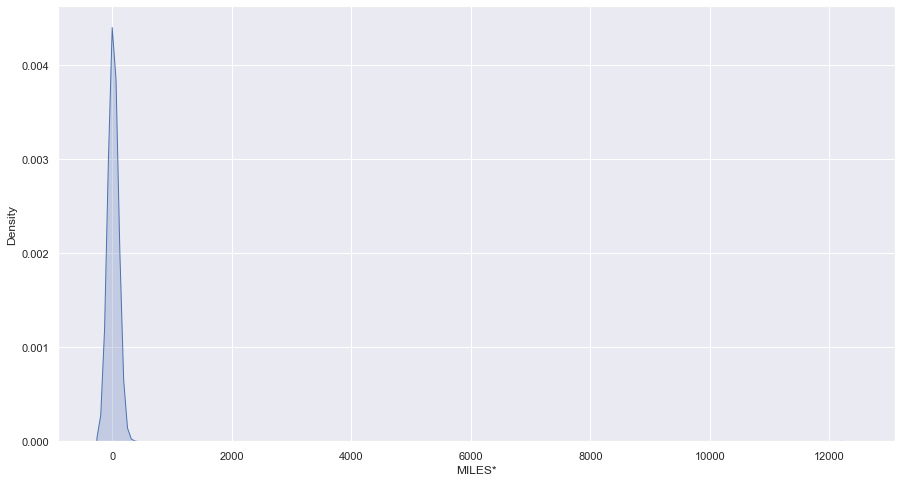

In [769]:
sns.kdeplot(data=df, x='MILES*', shade=True)

In [770]:
df[df['MILES*']==df['MILES*'].max()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [771]:
df.drop(1155,axis=0, inplace=True )

In [772]:
df['MILES*'].describe()

count    1154.000000
mean       10.567418
std        21.588452
min         0.500000
25%         2.900000
50%         6.000000
75%        10.400000
max       310.300000
Name: MILES*, dtype: float64

<AxesSubplot:xlabel='MILES*', ylabel='Density'>

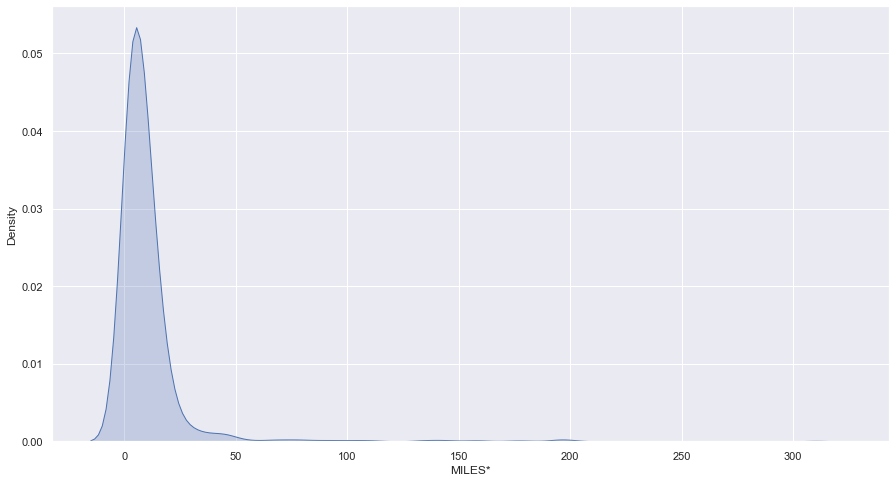

In [773]:
sns.kdeplot(data=df,x='MILES*', palette='dark', shade=True)

In [774]:
## last feature
df['PURPOSE*'].value_counts()

Meeting            186
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE*, dtype: int64

In [775]:
## let's check the missing values
print((df.isnull().sum()/df.shape[0])*100)
# or use
# print(df.isnull().mean()*100)

START_DATE*     0.000000
END_DATE*       0.000000
CATEGORY*       0.000000
START*          0.000000
STOP*           0.000000
MILES*          0.000000
PURPOSE*       43.500867
dtype: float64


In [776]:
''' purpose must be dropped as it contains more than 20% missing 
## [not important feature]- but the client has a question on it '''

' purpose must be dropped as it contains more than 20% missing \n## [not important feature]- but the client has a question on it '

### Q1: <font color='green'>For each purpose for each Category calculate the sum of kms driven <font/>

In [777]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [778]:
df.groupby(by=['CATEGORY*','PURPOSE*']).sum()['MILES*']

CATEGORY*  PURPOSE*       
Business   Airport/Travel       16.5
           Between Offices     197.0
           Customer Visit     2089.5
           Errand/Supplies     508.0
           Meal/Entertain      911.7
           Meeting            2841.4
           Temporary Site      523.7
Personal   Charity ($)          15.1
           Commute             180.2
           Moving               18.2
Name: MILES*, dtype: float64

In [779]:
## if you didn't understand maybe with pivioting you will
pd.pivot_table(data=df,index='PURPOSE*',columns='CATEGORY*',values='MILES*', aggfunc=sum)

CATEGORY*,Business,Personal
PURPOSE*,,
Airport/Travel,16.5,NaN
Between Offices,197.0,NaN
Charity ($),NaN,15.1
Commute,NaN,180.2
Customer Visit,2089.5,NaN
Errand/Supplies,508.0,NaN
Meal/Entertain,911.7,NaN
Meeting,2841.4,NaN
Moving,NaN,18.2


<AxesSubplot:xlabel='PURPOSE*', ylabel='MILES*'>

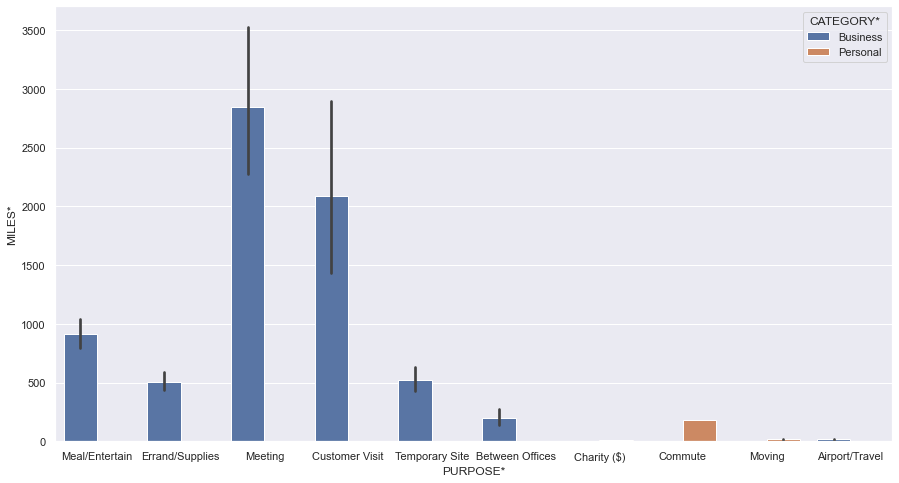

In [780]:
# or 
sns.barplot(data=df,x='PURPOSE*' ,y='MILES*', hue='CATEGORY*', estimator=sum)

In [781]:
## now drop the columns PURPOSE*
df.drop('PURPOSE*', axis=1, inplace=True)

In [782]:
df.isnull().mean()*100

START_DATE*    0.0
END_DATE*      0.0
CATEGORY*      0.0
START*         0.0
STOP*          0.0
MILES*         0.0
dtype: float64

## <font color='green'> lets do some feature engineering <font/>

In [783]:
df['START_DATE*'].iloc[15]

'1/11/2016 13:32'

In [784]:
from datetime import datetime

In [785]:
datetime.strptime('1/11/2016 13:32','%d/%m/%Y %H:%M')

datetime.datetime(2016, 11, 1, 13, 32)

In [786]:
## feature transformation 
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'],format ='%m/%d/%Y %H:%M')
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'],format ='%m/%d/%Y %H:%M')

In [787]:
df['START_DATE*'].unique()

array(['2016-01-01T21:11:00.000000000', '2016-01-02T01:25:00.000000000',
       '2016-01-02T20:25:00.000000000', ...,
       '2016-12-31T15:03:00.000000000', '2016-12-31T21:32:00.000000000',
       '2016-12-31T22:08:00.000000000'], dtype='datetime64[ns]')

In [788]:
df['END_DATE*'].unique()

array(['2016-01-01T21:17:00.000000000', '2016-01-02T01:37:00.000000000',
       '2016-01-02T20:38:00.000000000', ...,
       '2016-12-31T15:38:00.000000000', '2016-12-31T21:50:00.000000000',
       '2016-12-31T23:51:00.000000000'], dtype='datetime64[ns]')

In [789]:
## get the KMS column
df['KM*']=np.round(df['MILES*'].apply(lambda x: x*1.60934),2)

In [790]:
df[['MILES*','KM*']]

,MILES*,KM*
0,5.1,8.21
1,5.0,8.05
2,4.8,7.72
3,4.7,7.56
4,63.7,102.51
...,...,...
1150,0.7,1.13
1151,3.9,6.28
1152,16.2,26.07
1153,6.4,10.30


In [791]:
## we also can get the speed / get duration in minutes
df['DURATION*']=(df['END_DATE*']-df['START_DATE*'])/np.timedelta64(1,'m')

In [792]:
df[['START_DATE*','END_DATE*','DURATION*']].sample(5)

,START_DATE*,END_DATE*,DURATION*
587,2016-07-22 15:49:00,2016-07-22 16:22:00,33.0
318,2016-04-15 14:31:00,2016-04-15 15:01:00,30.0
201,2016-03-07 12:10:00,2016-03-07 12:26:00,16.0
168,2016-02-26 17:01:00,2016-02-26 17:12:00,11.0
719,2016-08-26 16:55:00,2016-08-26 17:12:00,17.0


In [793]:
df.isnull().mean()*100

START_DATE*    0.0
END_DATE*      0.0
CATEGORY*      0.0
START*         0.0
STOP*          0.0
MILES*         0.0
KM*            0.0
DURATION*      0.0
dtype: float64

In [794]:
df.drop('MILES*', axis=1, inplace=True)

In [795]:
## let's work with time 
df['year']=df['START_DATE*'].dt.year
df['month']=df['START_DATE*'].dt.month_name().str[:3]
df['day_name']=df['START_DATE*'].dt.day_name()
df['day']=df['START_DATE*'].dt.day

In [796]:
## let's get period
def get_periods(x):
    if x in range(0,13):
        return 'Morning'
    elif x in range(13,19):
        return 'Afternoon'
    elif x in range(19,21):
        return 'Evening'
    else:
        return 'Night'


In [797]:
df['period']=df['day'].apply(get_periods)

In [798]:
df['period'].unique()

array(['Morning', 'Afternoon', 'Evening', 'Night'], dtype=object)

In [799]:
df['day_name'].value_counts()

Friday       206
Tuesday      175
Monday       174
Thursday     154
Saturday     150
Sunday       148
Wednesday    147
Name: day_name, dtype: int64

## Q2 <font color='green'> Describe the kms of all trips


In [800]:
## let's check for errors

In [801]:
df['KM*'].describe()

count    1154.000000
mean       17.006716
std        34.743156
min         0.800000
25%         4.670000
50%         9.660000
75%        16.740000
max       499.380000
Name: KM*, dtype: float64

In [802]:
df[df['KM*']>=400] 
## this trip spent 4 hours so it make senese don't drop it 

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,KM*,DURATION*,year,month,day_name,day,period
269,2016-03-25 16:52:00,2016-03-25 22:22:00,Business,Latta,Jacksonville,499.38,330.0,2016,Mar,Friday,25,Night


In [803]:
## let's get the speed 
df['speed*']=np.round((df['KM*']/df['DURATION*']),2)
df['speed*'].unique()

array([ 1.37,  0.67,  0.59,  0.54,  1.53,  1.73,  2.29,  0.22,  0.98,
        0.4 ,  0.34,  0.5 ,  0.37,  0.2 ,  0.24,  0.19,  0.21,  0.26,
        0.27,  0.42,  1.39,  0.68,  1.05,  0.64,  0.84,  0.93,  0.7 ,
        0.69,  0.83,  0.87,  0.79,  0.78,  1.2 ,  0.48,  0.32,  0.36,
        0.46,  0.38,  0.45,  0.41,  1.04,  0.55,  0.94,  0.96,  1.18,
        0.53,  0.76,  0.71,  0.44,  0.47,  0.61,  1.14,  0.57,  0.49,
        0.43,  0.65,  0.88,  0.56,  0.6 ,  0.75,  0.66,  0.63,  0.51,
        0.99,  1.3 ,  0.85,  0.8 ,  0.72,  0.29,  0.77,  0.97,  1.35,
        0.35,  0.91,  1.45,  0.16,  4.73,  0.39,  2.45,  0.3 ,  1.  ,
        0.82,  0.58,  1.72,  0.62,  0.52,  0.74,  0.23,  0.18,  0.28,
        0.31,  0.89,  1.01,  0.25,  1.57,  1.16,  1.06,  0.92,  0.33,
        0.86,  1.11,  1.42,  0.17,  1.51,  1.96,  1.33,  1.31,  1.8 ,
        1.58,  1.62,  1.89,  1.21,  2.78,  1.23,  1.9 ,  1.6 ,  1.54,
        1.95,  1.22,  1.25,  6.12,  1.64,  1.81,  1.26,  1.99,  1.48,
        1.34,  0.73,

In [804]:
df['speed*'].describe()

count    1154.00
mean         inf
std          NaN
min         0.11
25%         0.40
50%         0.56
75%         0.77
max          inf
Name: speed*, dtype: float64

In [805]:
## it looks like data of speed has inf 
df[df['speed*']==np.inf]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,KM*,DURATION*,year,month,day_name,day,period,speed*
751,2016-09-06 17:49:00,2016-09-06 17:49:00,Business,Granta,Koamo,111.21,0.0,2016,Sep,Tuesday,6,Morning,inf
761,2016-09-16 07:08:00,2016-09-16 07:08:00,Business,Granta,Koamo,2.57,0.0,2016,Sep,Friday,16,Afternoon,inf
798,2016-10-08 15:03:00,2016-10-08 15:03:00,Business,Karachi,Karachi,5.79,0.0,2016,Oct,Saturday,8,Morning,inf
807,2016-10-13 13:02:00,2016-10-13 13:02:00,Business,Islamabad,Islamabad,1.13,0.0,2016,Oct,Thursday,13,Afternoon,inf


In [806]:
## lets solve this issue 
M=df[df['DURATION*']>100]['DURATION*'].mean()
df.at[751,'DURATION*']=M

In [807]:
mean_1_5=np.round(df[df['KM*'].between(1,6)]['KM*'].mean(),2)
mean_1_5

3.59

In [808]:
for ind,row in df.iterrows():
    if df.at[ind,'speed*']==np.inf:
        if ind in [761,798,807]:
            df.at[ind,'DURATION*']=mean_1_5
            

In [809]:
##
df['speed*']=np.round((df['KM*']/df['DURATION*']),2)
df['speed*'].unique()

array([ 1.37,  0.67,  0.59,  0.54,  1.53,  1.73,  2.29,  0.22,  0.98,
        0.4 ,  0.34,  0.5 ,  0.37,  0.2 ,  0.24,  0.19,  0.21,  0.26,
        0.27,  0.42,  1.39,  0.68,  1.05,  0.64,  0.84,  0.93,  0.7 ,
        0.69,  0.83,  0.87,  0.79,  0.78,  1.2 ,  0.48,  0.32,  0.36,
        0.46,  0.38,  0.45,  0.41,  1.04,  0.55,  0.94,  0.96,  1.18,
        0.53,  0.76,  0.71,  0.44,  0.47,  0.61,  1.14,  0.57,  0.49,
        0.43,  0.65,  0.88,  0.56,  0.6 ,  0.75,  0.66,  0.63,  0.51,
        0.99,  1.3 ,  0.85,  0.8 ,  0.72,  0.29,  0.77,  0.97,  1.35,
        0.35,  0.91,  1.45,  0.16,  4.73,  0.39,  2.45,  0.3 ,  1.  ,
        0.82,  0.58,  1.72,  0.62,  0.52,  0.74,  0.23,  0.18,  0.28,
        0.31,  0.89,  1.01,  0.25,  1.57,  1.16,  1.06,  0.92,  0.33,
        0.86,  1.11,  1.42,  0.17,  1.51,  1.96,  1.33,  1.31,  1.8 ,
        1.58,  1.62,  1.89,  1.21,  2.78,  1.23,  1.9 ,  1.6 ,  1.54,
        1.95,  1.22,  1.25,  6.12,  1.64,  1.81,  1.26,  1.99,  1.48,
        1.34,  0.73,

In [810]:
## LOOK AGAIN AT THEM
df[df['speed*']==np.inf]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,KM*,DURATION*,year,month,day_name,day,period,speed*


## Check Outliers

In [811]:
from datasist.structdata import detect_outliers

In [812]:
detect_outliers(data=df, n=0 , features=['speed*'] )

[0,
 4,
 5,
 6,
 23,
 108,
 116,
 121,
 126,
 142,
 232,
 251,
 261,
 269,
 270,
 281,
 285,
 296,
 297,
 298,
 299,
 335,
 355,
 357,
 358,
 359,
 375,
 377,
 383,
 405,
 425,
 427,
 431,
 438,
 452,
 525,
 536,
 546,
 559,
 607,
 646,
 672,
 726,
 727,
 750,
 753,
 754,
 762,
 768,
 773,
 781,
 786,
 788,
 789,
 791,
 798,
 799,
 804,
 841,
 842,
 843,
 869,
 870,
 871,
 880,
 881,
 933,
 936,
 960,
 961,
 1094]

In [813]:
df.loc[detect_outliers(data=df, n=0 , features=['speed*'] )]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,KM*,DURATION*,year,month,day_name,day,period,speed*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,8.21,6.0,2016,Jan,Friday,1,Morning,1.37
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,102.51,67.0,2016,Jan,Wednesday,6,Morning,1.53
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,6.92,4.0,2016,Jan,Wednesday,6,Morning,1.73
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,11.43,5.0,2016,Jan,Wednesday,6,Morning,2.29
23,2016-01-13 13:54:00,2016-01-13 14:07:00,Business,Downtown,Gulfton,18.02,13.0,2016,Jan,Wednesday,13,Afternoon,1.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,2016-11-10 15:17:00,2016-11-10 15:22:00,Business,San Francisco,Oakland,15.93,5.0,2016,Nov,Thursday,10,Morning,3.19
936,2016-11-11 09:35:00,2016-11-11 10:23:00,Business,Berkeley,Menlo Park,73.87,48.0,2016,Nov,Friday,11,Morning,1.54
960,2016-11-14 11:24:00,2016-11-14 12:13:00,Business,Berkeley,Mountain View,71.78,49.0,2016,Nov,Monday,14,Afternoon,1.46
961,2016-11-14 13:40:00,2016-11-14 14:33:00,Business,Mountain View,Berkeley,70.17,53.0,2016,Nov,Monday,14,Afternoon,1.32


In [814]:
df.describe()

,KM*,DURATION*,year,day,speed*
count,1154.000000,1154.000000,1154.0,1154.000000,1154.000000
mean,17.006716,23.386976,2016.0,16.298960,0.719376
std,34.743156,27.595531,0.0,8.710127,1.156893
min,0.800000,1.000000,2016.0,1.000000,0.110000
25%,4.670000,10.000000,2016.0,9.000000,0.400000
50%,9.660000,16.000000,2016.0,17.000000,0.560000
75%,16.740000,28.000000,2016.0,24.000000,0.760000
max,499.380000,336.000000,2016.0,31.000000,24.300000


<AxesSubplot:xlabel='KM*'>

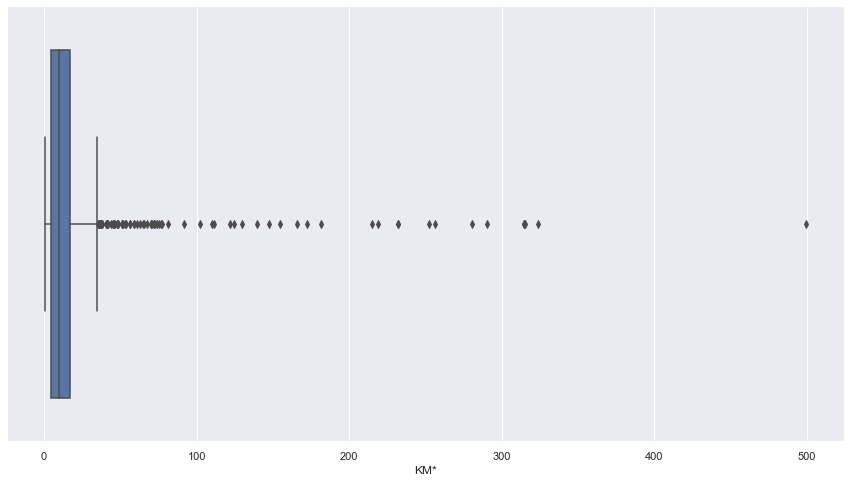

In [815]:
sns.boxplot(data=df, x='KM*')

In [816]:
df[df['KM*']>400]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,KM*,DURATION*,year,month,day_name,day,period,speed*
269,2016-03-25 16:52:00,2016-03-25 22:22:00,Business,Latta,Jacksonville,499.38,330.0,2016,Mar,Friday,25,Night,1.51


In [817]:
## THE outliers here make sense because it's the distance 

<AxesSubplot:>

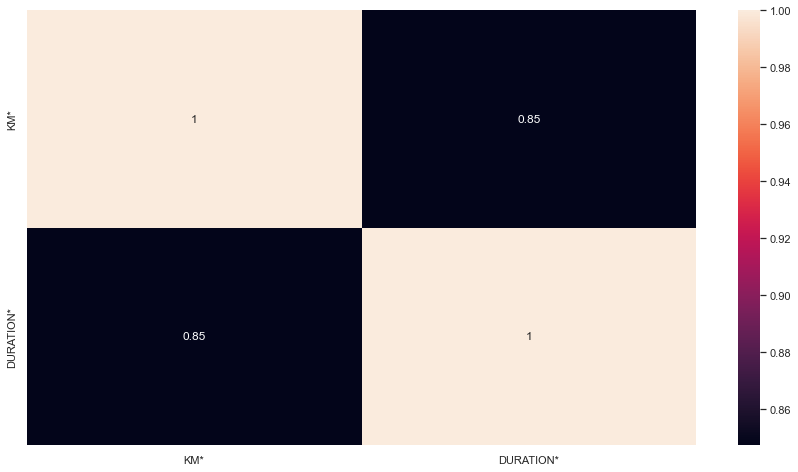

In [818]:
sns.heatmap(df[['KM*','DURATION*']].corr(), annot=True)
# since the correlation between time and kms propotional hence the speed outliers are meaningful 

## Q3 <font color='green'> Describe the speed of all trips </font>

In [819]:
df['speed*'].describe()

count    1154.000000
mean        0.719376
std         1.156893
min         0.110000
25%         0.400000
50%         0.560000
75%         0.760000
max        24.300000
Name: speed*, dtype: float64

## Q4 <font color='green'> KMS been driven from Fort Pierce to Fort Pierce and how many trips


In [820]:
print('total_kms=',df[(df['START*']=='Fort Pierce') & (df['STOP*']=='Fort Pierce')]['KM*'].sum(),'KM')

total_kms= 31.54 KM


In [821]:
print(df[(df['START*']=='Fort Pierce') & (df['STOP*']=='Fort Pierce')]['KM*'].count(),' Trip')

4  Trip


## Q5 <font color='green'> How many Trips in every start city and visualize the top 10

In [822]:
TOP_10=df['START*'].value_counts().sort_values(ascending=False).head(10)

In [823]:
TOP_10

Cary              201
Granta            148
Morrisville        85
Whitebridge        68
Islamabad          57
Lahore             36
Durham             36
Raleigh            28
Kar?chi            27
Westpark Place     17
Name: START*, dtype: int64

In [824]:
idx=df['START*'].value_counts().sort_values(ascending=False).head(10).index

In [825]:
idx

Index(['Cary', 'Granta', 'Morrisville', 'Whitebridge', 'Islamabad', 'Lahore',
       'Durham', 'Raleigh', 'Kar?chi', 'Westpark Place'],
      dtype='object')

In [826]:
df_top_10_start=df[df['START*'].isin(idx)]

<AxesSubplot:xlabel='START*', ylabel='count'>

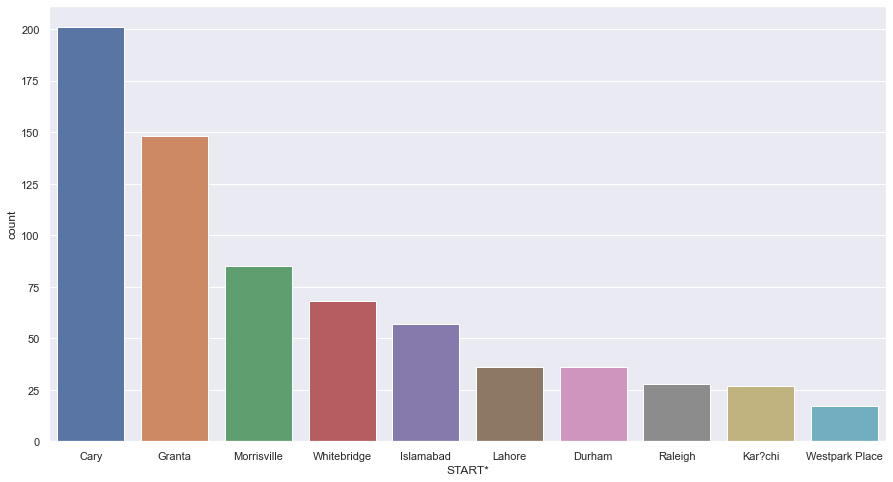

In [827]:
sns.countplot(data=df_top_10_start,x='START*', order=idx)

## Q6 <font color='green'>How many trips driven in all Months of year and visualize the top 4 month descening

In [828]:
idx=df['month'].value_counts().sort_values().head(4).index

In [829]:
idx

Index(['Sep', 'May', 'Apr', 'Jan'], dtype='object')

In [830]:
df_top4=df[df['month'].isin(idx)]

In [831]:
df_top4

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,KM*,DURATION*,year,month,day_name,day,period,speed*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,8.21,6.0,2016,Jan,Friday,1,Morning,1.37
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,8.05,12.0,2016,Jan,Saturday,2,Morning,0.67
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,7.72,13.0,2016,Jan,Saturday,2,Morning,0.59
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,7.56,14.0,2016,Jan,Tuesday,5,Morning,0.54
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,102.51,67.0,2016,Jan,Wednesday,6,Morning,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,2016-09-27 21:01:00,2016-09-28 02:37:00,Business,Granta,Koamo,314.79,336.0,2016,Sep,Tuesday,27,Night,0.94
777,2016-09-28 17:21:00,2016-09-28 19:36:00,Business,Islamabad,Koamo,32.99,135.0,2016,Sep,Wednesday,28,Night,0.24
778,2016-09-29 16:13:00,2016-09-29 18:47:00,Business,Granta,Islamabad,20.28,154.0,2016,Sep,Thursday,29,Night,0.13
779,2016-09-30 17:39:00,2016-09-30 20:20:00,Business,Islamabad,Islamabad,60.67,161.0,2016,Sep,Friday,30,Night,0.38


In [832]:
df['month'].value_counts().sort_values().head(4)

Sep    36
May    49
Apr    54
Jan    61
Name: month, dtype: int64

Text(1.0, 1.0, 'Top 4 Trip happens per month')

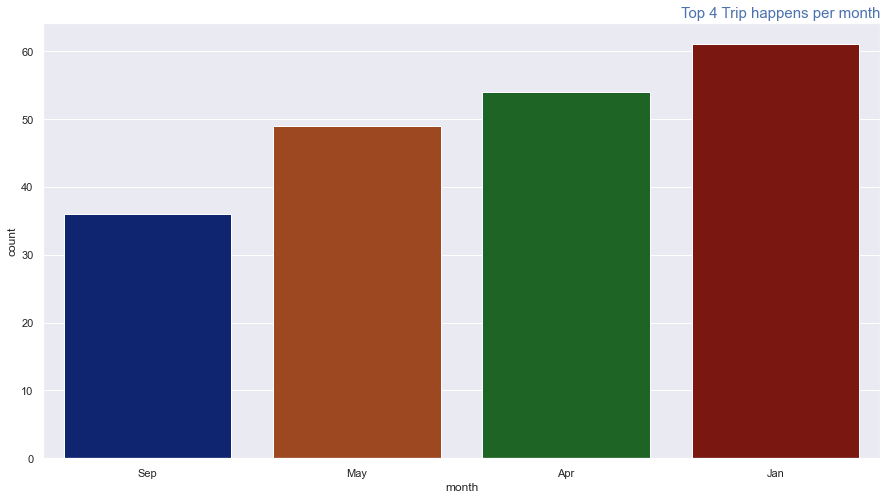

In [833]:
sns.countplot(data=df_top4, x='month' , palette='dark',order=idx)
plt.title('Top 4 Trip happens per month', size=15, color='b' , loc='right')

## Q7  <font color='green'>How many trips driven in all days of week 

In [834]:
df['day_name'].value_counts().sort_values(ascending=False)

Friday       206
Tuesday      175
Monday       174
Thursday     154
Saturday     150
Sunday       148
Wednesday    147
Name: day_name, dtype: int64

<AxesSubplot:xlabel='day_name', ylabel='count'>

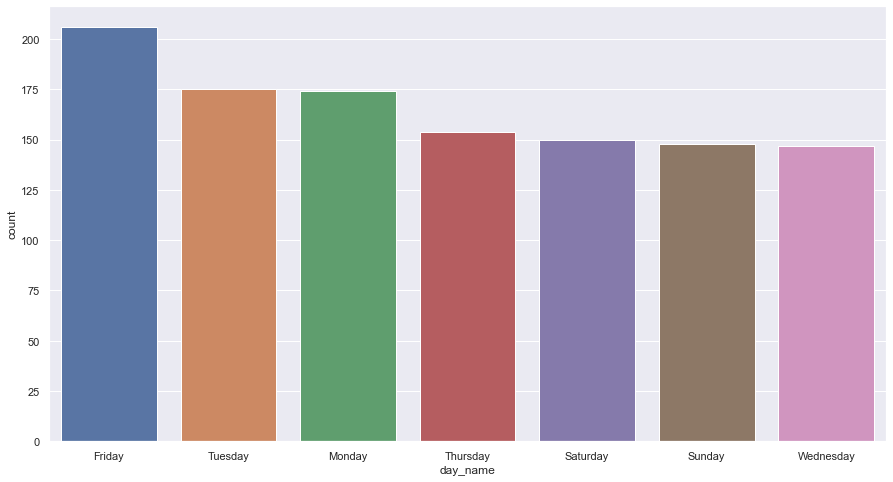

In [835]:
sns.countplot(data=df, x='day_name', order=df['day_name'].value_counts().sort_values(ascending=False).index)

## Q8 <font color='green'>  How many KMS driven in all period of the day and visualiaze them descending

In [836]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'KM*',
       'DURATION*', 'year', 'month', 'day_name', 'day', 'period', 'speed*'],
      dtype='object')

Text(1.0, 1.0, 'The KMS per days of each period')

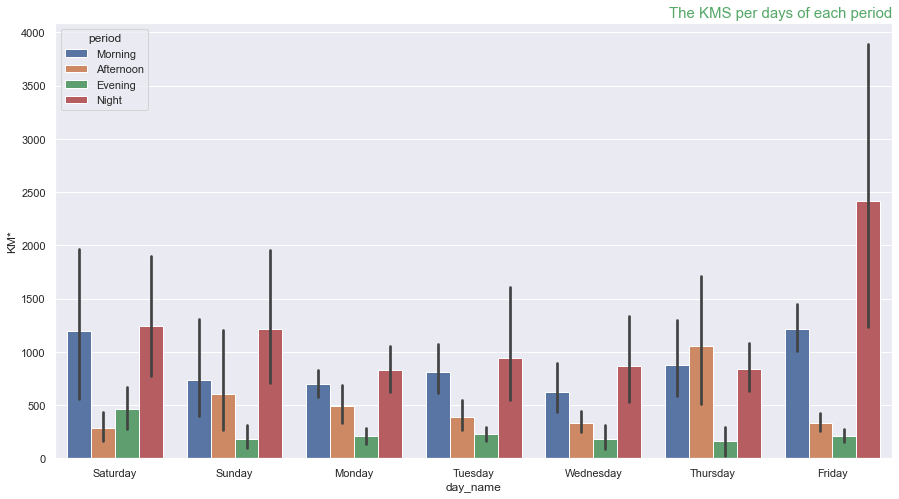

In [837]:
sns.barplot(data=df,x='day_name', y='KM*', hue='period', estimator=sum
            , order=['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday'])
plt.title("The KMS per days of each period", loc='right', color='g', size=15)

In [838]:
pd.pivot_table(data=df,index='day',columns='period', values='KM*', aggfunc=sum)

period,Afternoon,Evening,Morning,Night
day,,,,
1,NaN,NaN,532.52,NaN
2,NaN,NaN,986.54,NaN
3,NaN,NaN,496.97,NaN
4,NaN,NaN,414.57,NaN
5,NaN,NaN,331.35,NaN
6,NaN,NaN,833.14,NaN
7,NaN,NaN,402.67,NaN
8,NaN,NaN,383.98,NaN
9,NaN,NaN,380.13,NaN


## Q9 <font color='green'> For each period for each category which has most driven count

In [839]:
df['dummy']=1

In [840]:
pd.pivot_table(data=df,index='CATEGORY*',columns='period',values='dummy', aggfunc='count')

period,Afternoon,Evening,Morning,Night
CATEGORY*,,,,
Business,184,92,407,394
Personal,27,13,14,23


<AxesSubplot:xlabel='CATEGORY*', ylabel='count'>

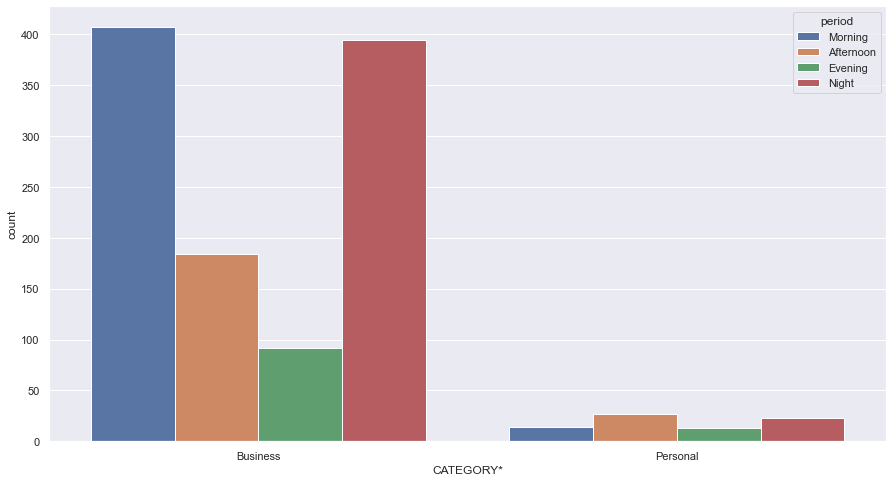

In [841]:
sns.countplot(data=df, hue='period',x='CATEGORY*')

## <font color='red'> Thank You!.